## Reading the data

In [49]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r'MovieGenre.csv', encoding='latin-1', index_col=0)
df=df.head(5000)

In [51]:
import urllib.request
from PIL import Image
from io import BytesIO

In [52]:
df.drop(columns=[ 'Imdb Link','IMDB Score',], inplace=True)
df.dropna(inplace=True)
df.head(5)


,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,imdbId,Title,Genre,Poster
0,0,0,0,0,0,0,0,0,0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,1,1,1,1,1,1,1,1,1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,2,2,2,2,2,2,2,2,2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,3,3,3,3,3,3,3,3,3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,4,4,4,4,4,4,4,4,4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


## One Hot Encoding

In [53]:
df['Genre'] = df['Genre'].str.split('|')

# Get all unique genres
unique_genres = set()
for genres in df['Genre']:
    unique_genres.update(genres)

for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'Genres' column if needed
df.drop('Genre', axis=1, inplace=True)

df.head(5)


,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,imdbId,...,Romance,Drama,Western,Comedy,Music,Film-Noir,Family,Biography,War,Fantasy
0,0,0,0,0,0,0,0,0,0,114709,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,113497,...,0,0,0,0,0,0,1,0,0,0
2,2,2,2,2,2,2,2,2,2,113228,...,1,0,0,1,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,114885,...,1,1,0,1,0,0,0,0,0,0
4,4,4,4,4,4,4,4,4,4,113041,...,1,0,0,1,0,0,1,0,0,0


In [54]:
df.shape

(3877, 38)

In [55]:
df.isnull().sum()

Unnamed: 0.8    0
Unnamed: 0.7    0
Unnamed: 0.6    0
Unnamed: 0.5    0
Unnamed: 0.4    0
Unnamed: 0.3    0
Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
imdbId          0
Title           0
Poster          0
News            0
Sport           0
Thriller        0
History         0
Animation       0
Mystery         0
Horror          0
Adult           0
Short           0
Talk-Show       0
Sci-Fi          0
Adventure       0
Musical         0
Crime           0
Documentary     0
Action          0
Romance         0
Drama           0
Western         0
Comedy          0
Music           0
Film-Noir       0
Family          0
Biography       0
War             0
Fantasy         0
dtype: int64

In [56]:
for x in df.columns:
    if x != 'imdbId':
        df.drop(columns={x},inplace=True)
    if x=='imdbId':
        break

In [57]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'News', 'Sport', 'Thriller', 'History',
       'Animation', 'Mystery', 'Horror', 'Adult', 'Short', 'Talk-Show',
       'Sci-Fi', 'Adventure', 'Musical', 'Crime', 'Documentary', 'Action',
       'Romance', 'Drama', 'Western', 'Comedy', 'Music', 'Film-Noir', 'Family',
       'Biography', 'War', 'Fantasy'],
      dtype='object')

In [24]:
data=df.iloc[:,3:]

## Stacked bar plot before and after removing minimal genres

<Figure size 1000x600 with 0 Axes>

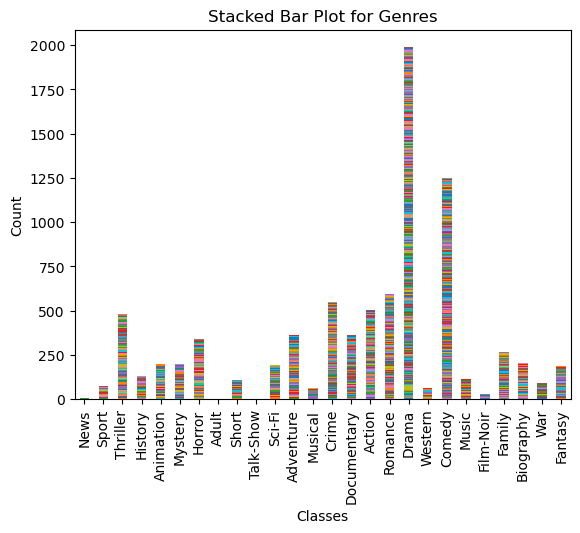

In [58]:
import matplotlib.pyplot as plt
#Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [59]:
data=df.iloc[:,3:]

In [60]:
import numpy as np
average_count = data.sum(axis=0).mean()
std_dev = np.std(data.sum(axis=0))
print(average_count,std_dev )
mean_plus_2std = average_count + 2 * std_dev
print(mean_plus_2std)


322.03846153846155 424.10852028961705
1170.2555021176956


In [61]:
value_counts = df.iloc[:,3:].apply(pd.value_counts)

# Define a threshold for the value counts
threshold = average_count  # Adjust this threshold based on your criteria

# Identify columns where the value counts are below the threshold
columns_to_drop = value_counts.columns[value_counts.min() < threshold]

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

<Figure size 1000x600 with 0 Axes>

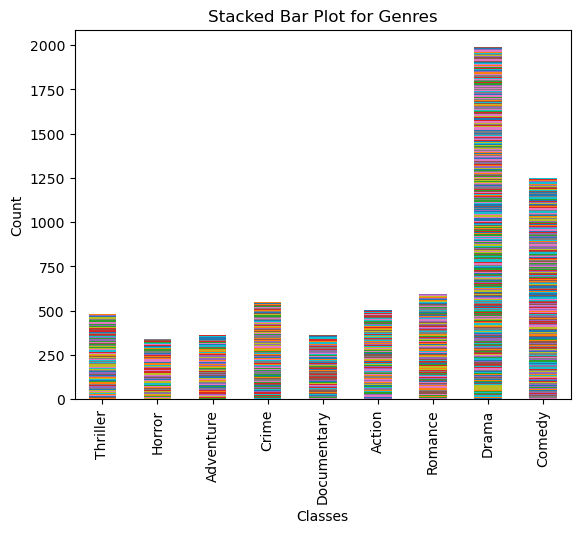

In [62]:
import matplotlib.pyplot as plt
data=df.iloc[:,3:]
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'Thriller', 'Adventure', 'Drama', 'Crime',
       'Horror', 'Documentary', 'Comedy', 'Action', 'Romance'],
      dtype='object')

## Model Architecture

In [29]:
import tensorflow as tf

class ProposedCNN(tf.keras.Model):
    def __init__(self,num_classes):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', padding='same')
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='valid')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')
        self.pool3 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.conv4 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')
        self.pool4 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.fc2 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.fc3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        inputs = tf.reshape(inputs, [-1, 224, 224, 1])
        x = self.conv1(inputs)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = self.pool4(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


## Image Preprocessing

In [30]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Function to preprocess image
def preprocess_image(image_path):
    # Open image
    try:
      with urllib.request.urlopen(image_path) as response:
          data = response.read()
          img = Image.open(BytesIO(data))
    except:
        img = Image.open(image_path)
    #img = Image.open(image_path)
    # Resize to 32x32 pixels.
    img = img.resize((224, 224))
    img = img.convert('RGB')
        # Convert to grayscale
    img = img.convert('L')
        # Convert image to numpy array
    img_array = np.array(img)
        # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
        # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



# Load LeNet model
X = []  # List of preprocessed images
  # List of corresponding genres
for index, row in df.iterrows():
    image_path = row['Poster']  # Assuming 'image_path' contains the file paths of images
    #genre = row[3:]  # Assuming 'genre' contains the genre labels
    try:
      preprocessed_image = preprocess_image(image_path)
      X.append(preprocessed_image)
    except:
       df.drop(df[df['Poster'] == image_path].index, inplace=True)
       pass
    

In [31]:
# Convert lists to numpy arrays
y = df.iloc[:,3:].to_numpy()
from sklearn.model_selection import train_test_split
X = np.array(X)
y = np.array(y)
print("splitting")
# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)

splitting


In [20]:
y.shape

(3427, 9)

## Experimental Analysis

In [32]:
from tensorflow.keras import layers, models, optimizers
print("model")
# 3. Define your model architecture (assuming LeNet)
# model = ProposedCNN(num_classes=len(df.iloc[:,3:].columns))
model = ProposedCNN(num_classes=y.shape[1])
print("compiling")
# 4. Compile the model

# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(2741, 1, 224, 224) (2741, 9)
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.2368 - loss: 3.4390 - val_accuracy: 0.2711 - val_loss: 3.3664
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.2345 - loss: 3.4116 - val_accuracy: 0.2711 - val_loss: 3.3575
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.2412 - loss: 3.3315 - val_accuracy: 0.2711 - val_loss: 3.4289
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.2565 - loss: 3.3008 - val_accuracy: 0.2711 - val_loss: 3.3720
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.2365 - loss: 3.3796 - val_accuracy: 0.2711 - val_loss: 3.4114
eval
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.2888 - loss: 3.4570 
Validation accuracy: 0.2711370289325714


In [33]:
from tensorflow.keras import layers, models, optimizers
print("model")
# 3. Define your model architecture (assuming LeNet)
# model = ProposedCNN(num_classes=len(df.iloc[:,3:].columns))
model = ProposedCNN(num_classes=y.shape[1])
print("compiling")
# 4. Compile the model

# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(2741, 1, 224, 224) (2741, 9)
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.1146 - loss: 3.5031 - val_accuracy: 0.2711 - val_loss: 3.3731
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - accuracy: 0.2609 - loss: 3.3102 - val_accuracy: 0.2711 - val_loss: 3.4060
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.2304 - loss: 3.3548 - val_accuracy: 0.2711 - val_loss: 3.4234
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.2391 - loss: 3.4054 - val_accuracy: 0.2711 - val_loss: 3.4222
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.2574 - loss: 3.3549 - val_accuracy: 0.2711 - val_loss: 3.4226
eval
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2888 - loss: 3.4737
Validation accuracy: 0.2711370289325714


In [41]:
from tensorflow.keras import layers, models, optimizers
print("model")
# 3. Define your model architecture (assuming LeNet)
# model = ProposedCNN(num_classes=len(df.iloc[:,3:].columns))
model = ProposedCNN(num_classes=y.shape[1])
print("compiling")
# 4. Compile the model

# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
optimizer = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(2741, 1, 224, 224) (2741, 9)
Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - accuracy: 0.1300 - loss: 3.9990 - val_accuracy: 0.1312 - val_loss: 4.0790
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - accuracy: 0.1247 - loss: 4.1209 - val_accuracy: 0.1312 - val_loss: 4.0362
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 516ms/step - accuracy: 0.1319 - loss: 4.0080 - val_accuracy: 0.1312 - val_loss: 3.9948
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 379ms/step - accuracy: 0.1365 - loss: 3.9394 - val_accuracy: 0.1312 - val_loss: 3.9549
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 343ms/step - accuracy: 0.1360 - loss: 3.8424 - val_accuracy: 0.1312 - val_loss: 3.9164
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 340ms/step - accuracy: 0.1297 - loss: 3.8807 - val_accuracy: 0.1312 - val_loss: 3.8795
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step - accuracy: 0.1219 - loss: 3.8055 - val_accuracy: 0.1312 - val_loss: 3.8440
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━

In [42]:
from tensorflow.keras import layers, models, optimizers
print("model")
# 3. Define your model architecture (assuming LeNet)
# model = ProposedCNN(num_classes=len(df.iloc[:,3:].columns))
model = ProposedCNN(num_classes=y.shape[1])
print("compiling")
# 4. Compile the model

# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(2741, 1, 224, 224) (2741, 9)
Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - accuracy: 0.2550 - loss: 3.4003 - val_accuracy: 0.2711 - val_loss: 3.3332
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 494ms/step - accuracy: 0.2557 - loss: 3.3278 - val_accuracy: 0.2711 - val_loss: 3.3344
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - accuracy: 0.2461 - loss: 3.3540 - val_accuracy: 0.2711 - val_loss: 3.3301
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 506ms/step - accuracy: 0.2574 - loss: 3.2904 - val_accuracy: 0.2711 - val_loss: 3.3290
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - accuracy: 0.2625 - loss: 3.2438 - val_accuracy: 0.2711 - val_loss: 3.3175
eval
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2888 - loss: 3.3637
Validation accuracy: 0.2711370289325714


## Model Summary

In [48]:
model.summary()

Model: "proposed_cnn_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ ?                      │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ ?                      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ ?                      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,423,517 (28.32 MB)

 Trainable params: 2,474,505 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,949,012 (18.88 MB)

## AUC- ROC Curve

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


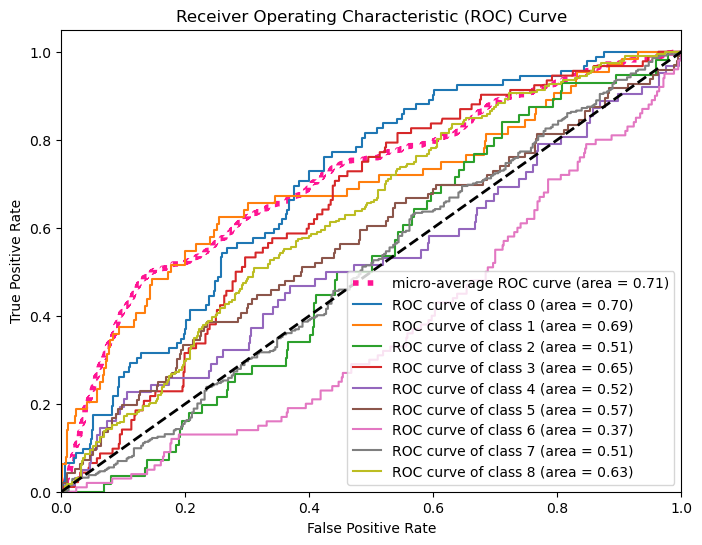

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Get model predictions
y_pred = model.predict(X_val)

# 2. Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Compute confusion matrix
genres= df.iloc[:,3:].columns.to_list()
y_true_labels = np.argmax(y_val, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


## Confusion matrix

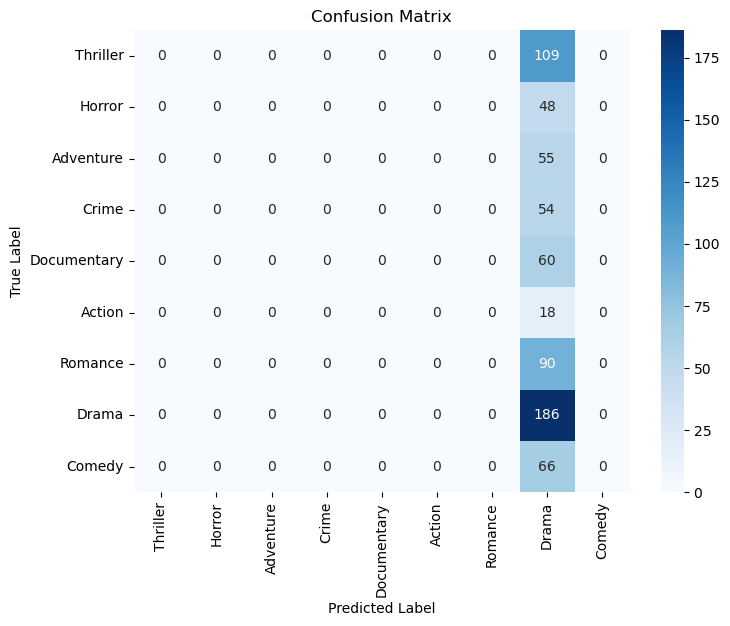

In [44]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=genres, yticklabels=genres)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

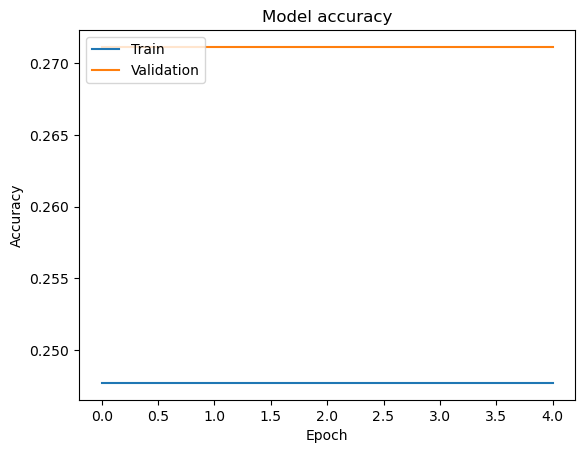

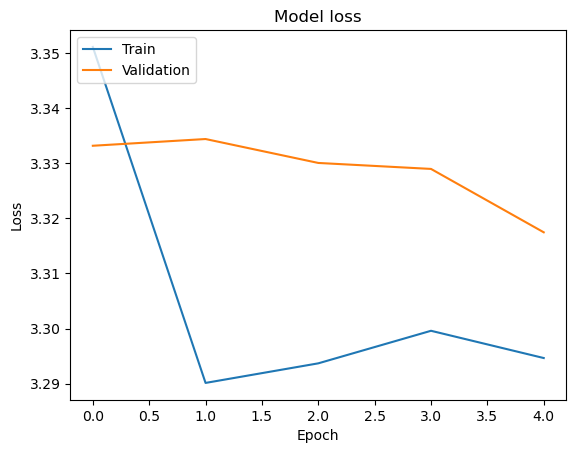

In [63]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Prediction

In [46]:
def show(preprocessed_image):
    import matplotlib.pyplot as plt
    processed_image = tf.image.convert_image_dtype(preprocessed_image, tf.uint8)

    # Convert the processed image tensor to NumPy array
    processed_image_np = processed_image.numpy()

    # Plot the processed image using Matplotlib
    plt.imshow(processed_image_np) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.06625440716743469, 0.04341810569167137, 0.04297296702861786, 0.04979507252573967, 0.0604126900434494, 0.07122665643692017, 0.0939648225903511, 0.366471529006958, 0.20548377931118011]]
7 0.366471529006958 Drama
8 0.20548377931118011 Comedy
6 0.0939648225903511 Romance


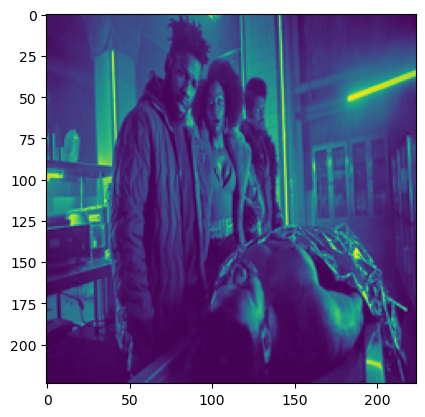

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.06335639208555222, 0.040478579699993134, 0.042364638298749924, 0.044631920754909515, 0.05929286405444145, 0.06989781558513641, 0.09199903905391693, 0.36449292302131653, 0.2234857678413391]]
7 0.36449292302131653 Drama
8 0.2234857678413391 Comedy
6 0.09199903905391693 Romance


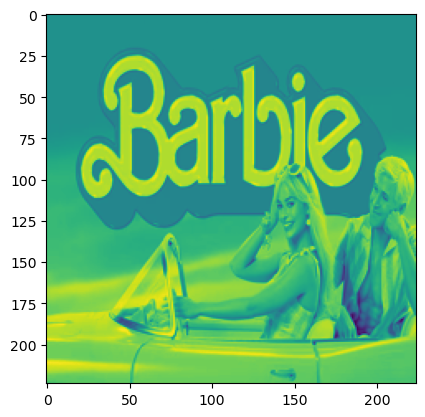

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.06547734886407852, 0.04294516518712044, 0.042786937206983566, 0.049192167818546295, 0.05960846319794655, 0.07053018361330032, 0.09326536953449249, 0.3705599904060364, 0.20563443005084991]]
7 0.3705599904060364 Drama
8 0.20563443005084991 Comedy
6 0.09326536953449249 Romance


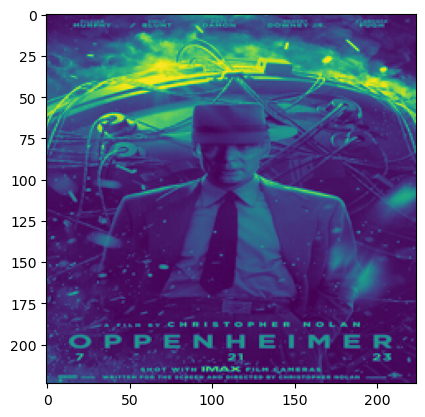

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.06381100416183472, 0.04084014147520065, 0.04241060093045235, 0.04531112685799599, 0.059453658759593964, 0.07029355317354202, 0.0924668088555336, 0.36361756920814514, 0.22179549932479858]]
7 0.36361756920814514 Drama
8 0.22179549932479858 Comedy
6 0.0924668088555336 Romance


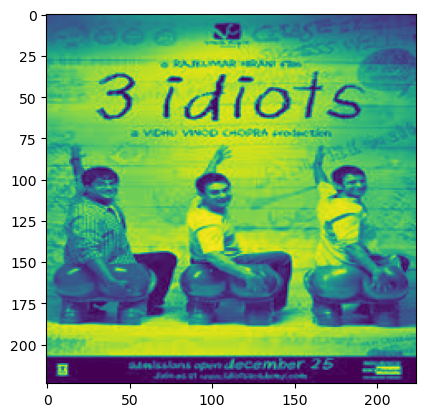

In [47]:
file4=r'https://media.timeout.com/images/106027003/1024/576/image.webp'
file3=r'C:\Users\mkolla1\OneDrive - Georgia State University\Desktop\Spring 2024\ML\Project\Images\download.jpg'
file1=r'https://movies.universalpictures.com/media/opr-tsr1sheet3-look2-rgb-3-1-1-64545c0d15f1e-1.jpg'
file=r'https://www.kenosha.com/wp-content/uploads/2023/08/et00072466-jjadjvahwx-landscape-copy.png'
bumble=r'https://www.livemint.com/lm-img/img/2024/01/24/600x338/Fighter_movie_1704218483865_1706073209317.jpg'
files=r'https://facts.net/wp-content/uploads/2023/05/Top-Gun-Maverick-730x481.jpg'
file2=r'https://theobjectivestandard.com/wp-content/uploads/2022/03/3-Idiots-Written-and-Directed-by-Rajkumar-Hirani-2048x1216.jpg'
genres= df.iloc[:,3:].columns.to_list()
files=[file4, file, file1, file3]
for x in files:
    preprocessed_image = preprocess_image(x)
    
    predictions = model.predict(preprocessed_image)
    predictions=predictions.tolist()
    classes=[]
    for x in predictions:
        for y in x:
            classes.append(y)
    i=0
    print(predictions)
    while i!=3:
        print(classes.index(max(classes)), max(classes), genres[classes.index(max(classes))])
        classes[classes.index(max(classes))]= -1000
        i+=1
    plt.imshow(preprocessed_image.reshape(224, 224))  # Assuming the image is grayscale
    plt.show()
#[0.05262700095772743, 0.13294711709022522, 0.01912735402584076, 0.05586215481162071, 0.05708613991737366